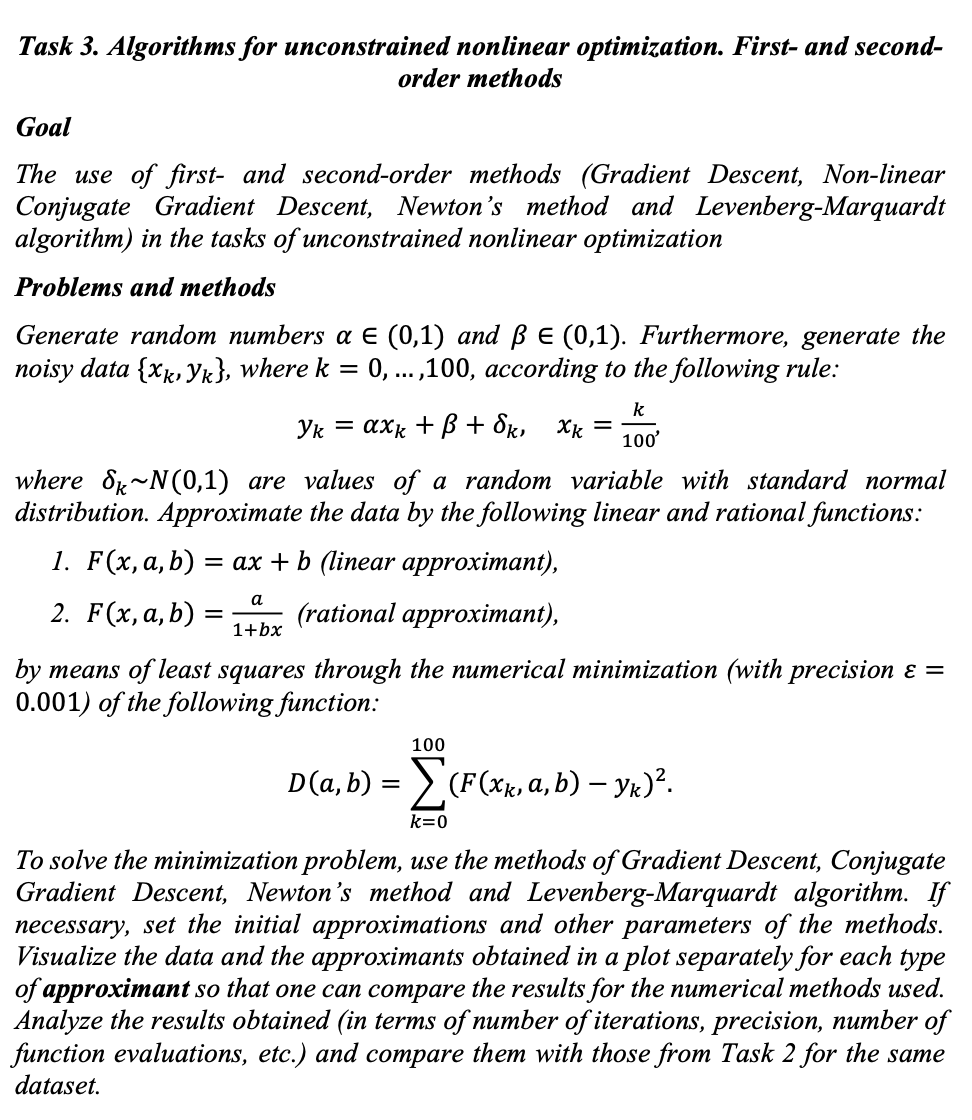


In [29]:
import random
import numpy as np
import pandas as pd
from numpy.polynomial import polynomial as P
import scipy.optimize 
from typing import List
import math, copy

Generate random alpha and betha

In [30]:
alpha = random.uniform(0, 1)
betha = random.uniform(0, 1)
b = np.random.normal(0, 1, 100)
print(f'alpha: {alpha}')
print(f'betha: {betha}')

alpha: 0.8536915724238479
betha: 0.3574036384627326


Generate noizy data

In [31]:
df = pd.DataFrame(columns=('X', 'Y'))

for k in range(100):
    df.loc[k] = [k / 100, alpha*(k / 100) + betha + b[k]]
print(f'df: {df}')


df:        X         Y
0   0.00  1.584935
1   0.01  0.249210
2   0.02 -0.289428
3   0.03  0.894661
4   0.04 -2.014234
..   ...       ...
95  0.95  1.029258
96  0.96  1.532181
97  0.97  0.130227
98  0.98  1.029863
99  0.99  0.073838

[100 rows x 2 columns]


Cost function

In [32]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = df['Y'].shape[0] 
    
    cost = 0 
    for i in range(m): 
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    return cost

LINEAR APPROXIMATION

GRADIENT DESCENT

In [33]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [43]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [44]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final_grad, b_final_grad, J_hist, p_hist = gradient_descent(df['X'],df['Y'], w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final_grad:8.4f},{b_final_grad:8.4f})")

Iteration    0: Cost 1.60e+02  dj_dw: -4.537e-01, dj_db: -7.789e-01   w:  4.537e-03, b: 7.78869e-03
Iteration 1000: Cost 9.61e+01  dj_dw: -1.652e-02, dj_db:  8.754e-03   w:  5.684e-01, b: 5.06257e-01
Iteration 2000: Cost 9.57e+01  dj_dw: -8.537e-03, dj_db:  4.524e-03   w:  6.893e-01, b: 4.42189e-01
Iteration 3000: Cost 9.56e+01  dj_dw: -4.411e-03, dj_db:  2.338e-03   w:  7.518e-01, b: 4.09085e-01
Iteration 4000: Cost 9.56e+01  dj_dw: -2.279e-03, dj_db:  1.208e-03   w:  7.840e-01, b: 3.91979e-01
Iteration 5000: Cost 9.56e+01  dj_dw: -1.178e-03, dj_db:  6.241e-04   w:  8.007e-01, b: 3.83141e-01
Iteration 6000: Cost 9.56e+01  dj_dw: -6.085e-04, dj_db:  3.225e-04   w:  8.093e-01, b: 3.78575e-01
Iteration 7000: Cost 9.56e+01  dj_dw: -3.144e-04, dj_db:  1.666e-04   w:  8.138e-01, b: 3.76215e-01
Iteration 8000: Cost 9.56e+01  dj_dw: -1.624e-04, dj_db:  8.609e-05   w:  8.161e-01, b: 3.74996e-01
Iteration 9000: Cost 9.56e+01  dj_dw: -8.393e-05, dj_db:  4.448e-05   w:  8.173e-01, b: 3.74366e-01


nonlinear conjugate gradient algorithm

In [45]:
def compute_cost_fmin_cg(x): 
    # number of training examples
    m = df['Y'].shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = x[0] * df['X'][i] + x[1]
        cost = (f_wb - df['Y'][i]) ** 2  
        cost_sum = cost_sum + cost  

    return cost_sum

initial_guess = np.asarray((0, 0))

w_fmin_cg, b_fmin_cg = scipy.optimize.fmin_cg(compute_cost_fmin_cg, initial_guess)
print(f"(w,b) found by gradient descent: ({w_fmin_cg:8.4f},{b_fmin_cg:8.4f})")

Optimization terminated successfully.
         Current function value: 95.585558
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
(w,b) found by gradient descent: (  0.8185,  0.3737)


Newton's method

In [155]:
BFGS = minimize(compute_cost_fmin_cg, initial_guess, method="BFGS", options={'xatol': 1e-3})
print(BFGS)

      fun: 95.58555784868942
 hess_inv: array([[ 0.06000598, -0.02970295],
       [-0.02970295,  0.01970296]])
      jac: array([-1.90734863e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.8185382 , 0.37369258])


/var/folders/tt/rhnv8s9j45dfkl45r1y57vw80000gn/T/ipykernel_41842/339760319.py:1: OptimizeWarning: Unknown solver options: xatol
  BFGS = minimize(compute_cost_fmin_cg, initial_guess, method="BFGS", options={'xatol': 1e-3})


In [157]:
Nelder_Mead = minimize(compute_cost_fmin_cg, initial_guess, method="Nelder-Mead", options={'xatol': 1e-3})
print(Nelder_Mead)

 final_simplex: (array([[0.81830453, 0.37381633],
       [0.81915262, 0.37342249],
       [0.81925095, 0.37352076]]), array([95.58555831, 95.58556111, 95.58556536]))
           fun: 95.58555831027869
       message: 'Optimization terminated successfully.'
          nfev: 76
           nit: 39
        status: 0
       success: True
             x: array([0.81830453, 0.37381633])


In [97]:
initial_guess = np.asarray((0.8185, 0.3737))
res_newton = scipy.optimize.newton(compute_cost_fmin_cg, initial_guess, tol=10e-5)
print(f"(w,b) found by gradient descent: {res}")

(w,b) found by gradient descent: [0.81849456 0.37369589]


LM method

In [89]:
def compute_gradient_LM(x): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = len(df['X'])  
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = x[0] * df['X'][i] + x[1] 
        dj_dw_i = (f_wb - df['Y'][i]) * df['X'][i]
        dj_db_i = f_wb - df['Y'][i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return [dj_dw, dj_db]

In [153]:
res_LM = scipy.optimize.root(compute_gradient_LM, [0,0], method='lm', jac=False).x
print(f'(w,b) found by LM: {res_LM}')

(w,b) found by LM: [ 0.47964009 -0.65946516]


In [98]:
y_GD = w_final_grad * df['X'] + b_final_grad
y_fmin_cg = w_fmin_cg * df['X'] + b_fmin_cg
y_newton = res_newton[0]*df['X'] + res_newton[1]
y_lm = res_LM[0]*df['X'] + res_LM[1]

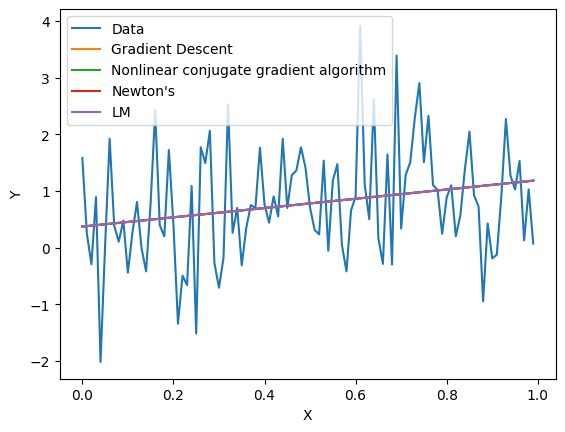

In [100]:
mp.plot(df["X"], df["Y"],label='Data')
mp.plot(df["X"], y_GD, label="Gradient Descent")
mp.plot(df["X"], y_fmin_cg, label="Nonlinear conjugate gradient algorithm")
mp.plot(df["X"], y_newton,label="Newton's")
mp.plot(df["X"], y_lm,label="LM")
mp.xlabel("X")
mp.ylabel("Y")
mp.legend()
mp.show()

RATIONAL APPROXIMATION

Gradient descent

In [158]:
def compute_cost_rational(x, y, w, b): 
    m = df['Y'].shape[0] 
    
    cost_sum = 0 
    for i in range(m):
        divider = (b * x[i] + 1)
        if b * x[i] == 1:
            break
        f_wb = w / divider
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  

    return cost_sum

In [159]:
def compute_gradient_rational(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        
        divider = (b * x[i] + 1)
        if b * x[i] == 1:
            break
        f_wb = w / divider
        
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [160]:
def gradient_descent_rational(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [161]:
# initialize parameters
w_init = 0.5
b_init = -0.5
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.0001
# run gradient descent
w_final_grad, b_final_grad, J_hist, p_hist = gradient_descent_rational(df['X'],df['Y'], w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost_rational, compute_gradient_rational)
print(f"(w,b) found by gradient descent: ({w_final_grad},{b_final_grad})")

Iteration    0: Cost 9.83e+01  dj_dw: -7.244e-02, dj_db: -8.822e-02   w:  5.000e-01, b:-4.99991e-01
Iteration 1000: Cost 9.83e+01  dj_dw: -7.081e-02, dj_db: -8.352e-02   w:  5.072e-01, b:-4.91404e-01
Iteration 2000: Cost 9.82e+01  dj_dw: -6.911e-02, dj_db: -7.882e-02   w:  5.142e-01, b:-4.83287e-01
Iteration 3000: Cost 9.81e+01  dj_dw: -6.736e-02, dj_db: -7.410e-02   w:  5.210e-01, b:-4.75641e-01
Iteration 4000: Cost 9.81e+01  dj_dw: -6.555e-02, dj_db: -6.938e-02   w:  5.276e-01, b:-4.68468e-01
Iteration 5000: Cost 9.80e+01  dj_dw: -6.370e-02, dj_db: -6.466e-02   w:  5.341e-01, b:-4.61766e-01
Iteration 6000: Cost 9.80e+01  dj_dw: -6.180e-02, dj_db: -5.995e-02   w:  5.404e-01, b:-4.55535e-01
Iteration 7000: Cost 9.79e+01  dj_dw: -5.985e-02, dj_db: -5.525e-02   w:  5.465e-01, b:-4.49775e-01
Iteration 8000: Cost 9.79e+01  dj_dw: -5.787e-02, dj_db: -5.057e-02   w:  5.523e-01, b:-4.44484e-01
Iteration 9000: Cost 9.78e+01  dj_dw: -5.585e-02, dj_db: -4.591e-02   w:  5.580e-01, b:-4.39661e-01


nonlinear conjugate gradient algorithm

In [162]:
def compute_cost_rational_2(x): 
    # number of training examples
    m = df['Y'].shape[0] 
    
    cost_sum = 0 
    for i in range(m):
        f_wb = x[0] / (df['X'][i] * x[1] + 1)
        cost = (f_wb - df['Y'][i]) ** 2  
        cost_sum = cost_sum + cost  
    return cost_sum

In [163]:
initial_guess = np.asarray((0, 0))

w_fmin_cg, b_fmin_cg = scipy.optimize.fmin_cg(compute_cost_rational_2, initial_guess)
print(f"(w,b) found by gradient descent: ({w_fmin_cg:8.4f},{b_fmin_cg:8.4f})")

Optimization terminated successfully.
         Current function value: 97.367971
         Iterations: 12
         Function evaluations: 99
         Gradient evaluations: 33
(w,b) found by gradient descent: (  0.5704, -0.4991)


In [165]:
initial_guess = np.asarray((0.5, -0.4))
res_newton = scipy.optimize.newton(compute_cost_rational_2, initial_guess, tol=10e-6)
print(f"(w,b) found by gradient descent: {res}")

(w,b) found by gradient descent: [0.81849456 0.37369589]


In [166]:
def compute_gradient_LM(x): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = len(df['X'])  
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = x[0] / (df['X'][i] * x[1] + 1)
        dj_dw_i = (f_wb - df['Y'][i]) * df['X'][i]
        dj_db_i = f_wb - df['Y'][i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return [dj_dw, dj_db]

In [172]:
res_LM = scipy.optimize.root(compute_gradient_LM, [0,0], method='lm', jac=False).x
print(f'(w,b) found by LM: {res_LM}')

(w,b) found by LM: [ 0.47964009 -0.65946516]


In [175]:
y_1 = w_final_grad / (df['X'] * b_final_grad + 1)
y_2 = w_fmin_cg / (df['X']* b_fmin_cg + 1)
y_3 = w_fmin_cg / (df['X'] + b_fmin_cg + 1)
y_4 = res_LM[0] / (df['X'] + res_LM[1] + 1)

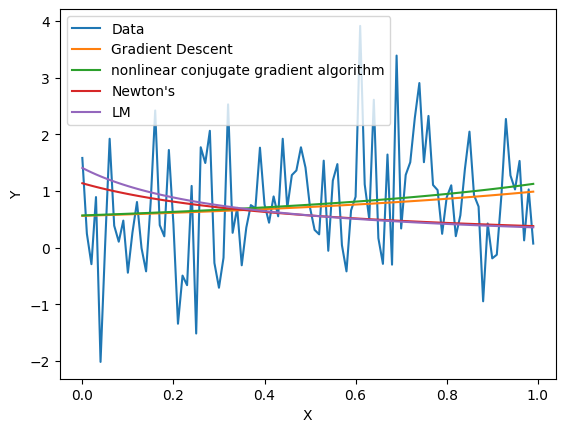

In [176]:
mp.plot(df["X"], df["Y"],label='Data')
mp.plot(df["X"], y_1, label="Gradient Descent")
mp.plot(df["X"], y_2, label="nonlinear conjugate gradient algorithm")
mp.plot(df["X"], y_3,label="Newton's")
mp.plot(df["X"], y_4,label="LM")
mp.xlabel("X")
mp.ylabel("Y")
mp.legend()
mp.show()

In [177]:
Nelder_Mead = minimize(compute_cost_rational_2, initial_guess, method="Nelder-Mead")
print(f'Nelder: {Nelder_Mead}')

Nelder:  final_simplex: (array([[ 0.57038153, -0.49910974],
       [ 0.57031213, -0.49916435],
       [ 0.57033177, -0.49920386]]), array([97.36797074, 97.36797089, 97.36797104]))
           fun: 97.36797073987753
       message: 'Optimization terminated successfully.'
          nfev: 56
           nit: 29
        status: 0
       success: True
             x: array([ 0.57038153, -0.49910974])


In [179]:
BFGS = minimize(compute_cost_rational_2, initial_guess, method="BFGS")
print(f'BFGS: {BFGS}')

BFGS:       fun: 97.36797069322917
 hess_inv: array([[0.00784652, 0.00919365],
       [0.00919365, 0.01603068]])
      jac: array([-7.62939453e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([ 0.57036512, -0.49911161])
